In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random

In [2]:
np.random.seed(0)


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# see the shapes of our data imported from MNIST dataset.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"


In [7]:
num_of_samples = []


In [8]:
cols = 5
num_classes = 10

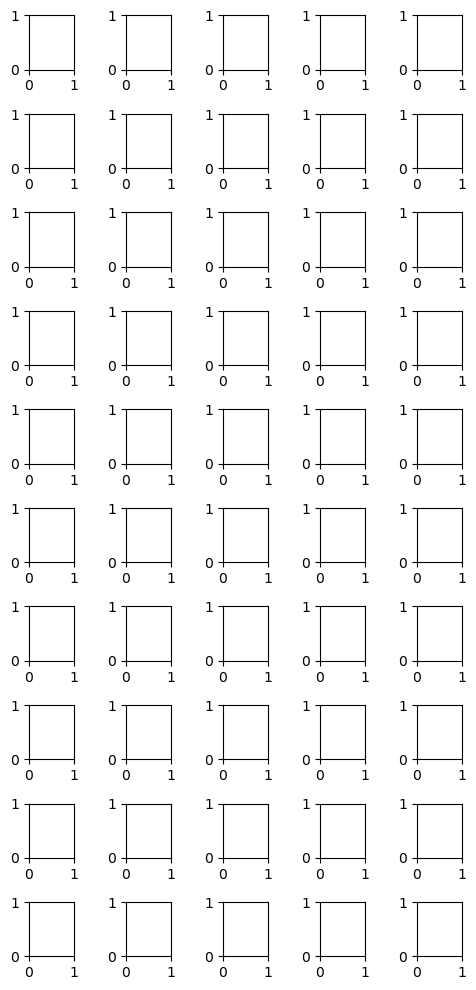

In [50]:
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 10))
fig.tight_layout()  # To avoid overlapping of plots

In [10]:
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off") # To remove axis
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

No.of Samples: [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

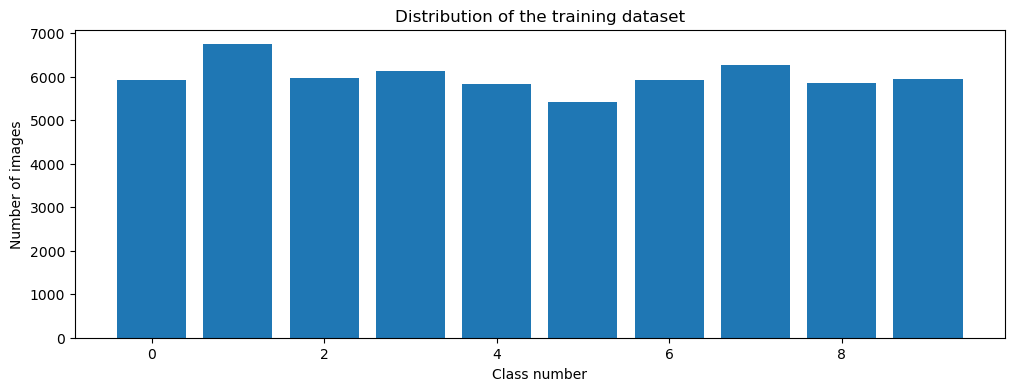

In [11]:
# shows the no.of images belonging to each class
print("No.of Samples:", num_of_samples)
# Lets visualize this with bar plots
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [12]:
# (labels to encode, total no.of classes)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
X_train = X_train/255 
X_test = X_test/255

In [15]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print("training data", X_train.shape)
print("testing data", X_test.shape)


training data (60000, 784)
testing data (10000, 784)


In [16]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8600 (33.59 KB)
Trainable params: 8600 (33.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [18]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 30, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/30
270/270 [==============================] - 2s 7ms/step - loss: 0.1569 - accuracy: 0.9532 - val_loss: 0.1995 - val_accuracy: 0.9467
Epoch 2/30
270/270 [==============================] - 2s 7ms/step - loss: 0.1570 - accuracy: 0.9537 - val_loss: 0.1810 - val_accuracy: 0.9497
Epoch 3/30
270/270 [==============================] - 2s 7ms/step - loss: 0.1536 - accuracy: 0.9544 - val_loss: 0.1833 - val_accuracy: 0.9518
Epoch 4/30
270/270 [==============================] - 2s 7ms/step - loss: 0.1523 - accuracy: 0.9556 - val_loss: 0.1831 - val_accuracy: 0.9523
Epoch 5/30
270/270 [==============================] - 2s 7ms/step - loss: 0.1514 - accuracy: 0.9550 - val_loss: 0.1857 - val_accuracy: 0.9488
Epoch 6/30
270/270 [==============================] - 2s 7ms/step - loss: 0.1602 - accuracy: 0.9523 - val_loss: 0.1700 - val_accuracy: 0.9538
Epoch 7/30
270/270 [==============================] - 2s 7ms/step - loss: 0.1495 - accuracy: 0.9559 - val_loss: 0.1924 - val_accuracy: 0.9498
Epoch 

Text(0.5, 0, 'epoch')

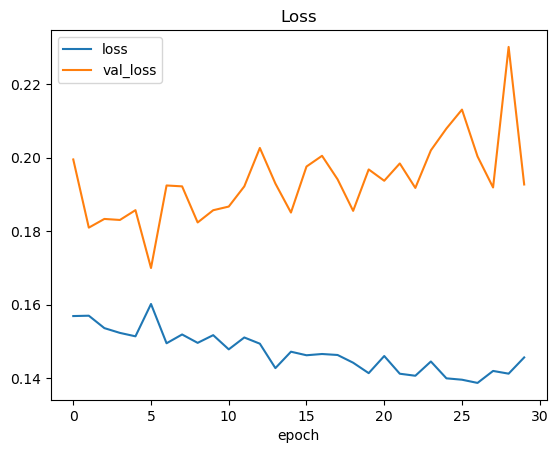

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

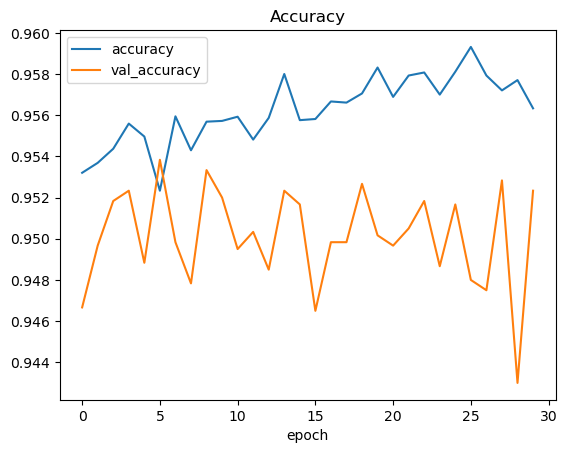

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])


<class 'list'>
Test score: 0.22578811645507812
Test accuracy: 0.944100022315979


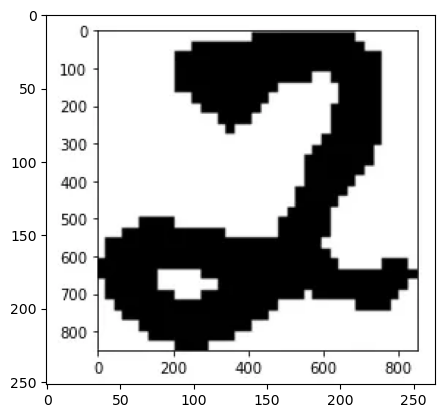

In [37]:
import requests
from PIL import Image
url = 'https://miro.medium.com/v2/resize:fit:530/format:webp/1*8yAyYB5yy3Zb5DLlOrRFhw.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img,cmap=plt.get_cmap('gray'))

resized image shape: (28, 28, 3)
Grayscale image shape: (28, 28)


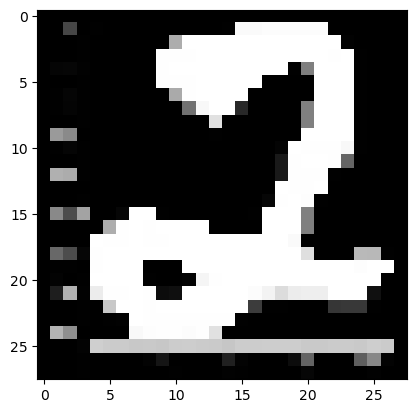

In [41]:
import cv2
array_img = np.asarray(img)
resized_img = cv2.resize(array_img, (28, 28))
print("resized image shape:", resized_img.shape)
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
print("Grayscale image shape:", gray_img.shape)
image = cv2.bitwise_not(gray_img)
plt.imshow(image, cmap=plt.get_cmap('gray'))

In [46]:
image = image/255
image = image.reshape(1, 784)
prediction = np.argmax(model.predict(image), axis=-1)
print("predicted digit:", str(prediction))

1/1 [==============================] - 0s 53ms/step
predicted digit: [5]
